In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("dm_office_sales.csv")

<Axes: xlabel='salary'>

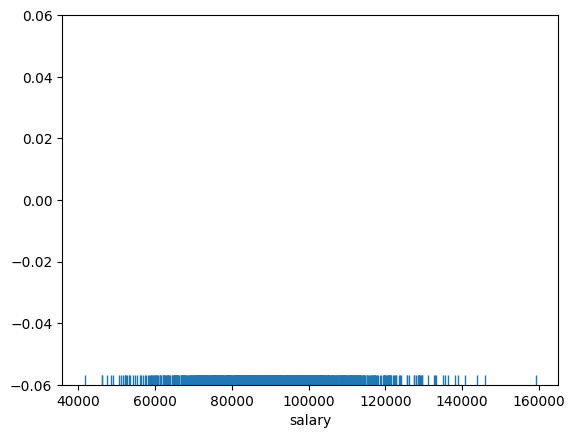

In [4]:
# A rug plot is 1D scatter plot as it is plotted for just one continuous valued column
sns.rugplot(x='salary', data=df)

<Axes: xlabel='salary'>

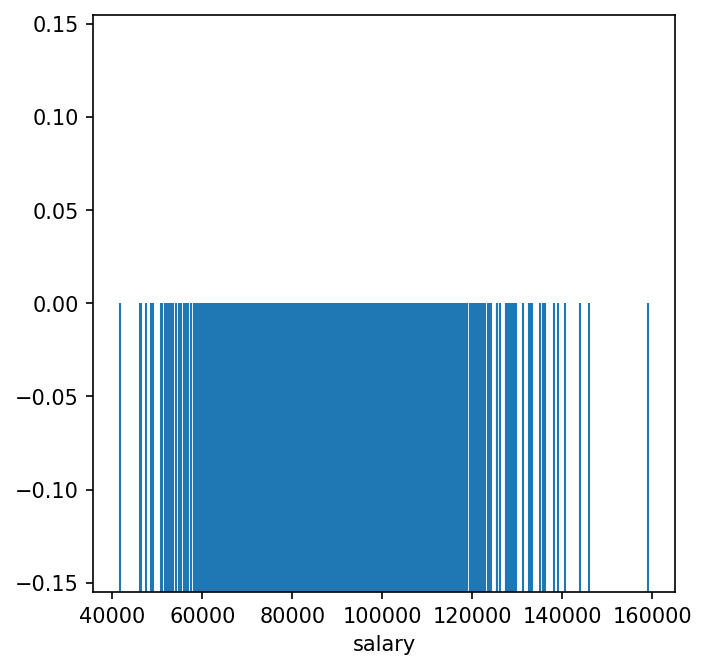

In [5]:
plt.figure(figsize=(5,5),dpi=150)
sns.rugplot(x='salary', data=df,height=0.5)

<Figure size 750x750 with 0 Axes>

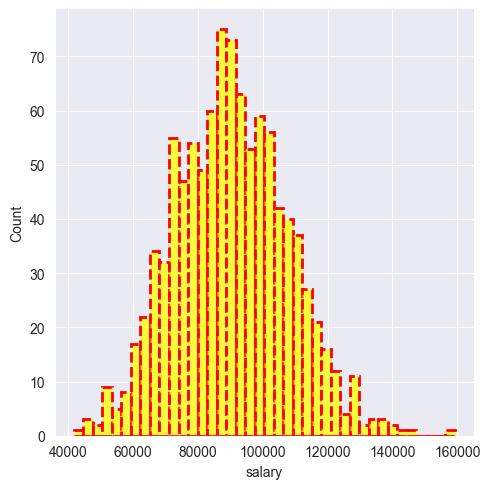

In [6]:
#distribution plot
plt.figure(figsize=(5,5),dpi=150)
sns.set_style('darkgrid')
sns.displot(x='salary',data=df,bins=40,color='yellow',edgecolor='red',linewidth=2,ls='--')

<Figure size 750x750 with 0 Axes>

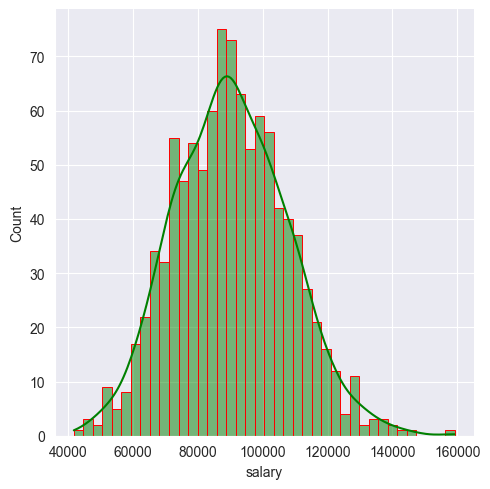

In [8]:
#Kernel Density Plot
#distribution plot
plt.figure(figsize=(5,5),dpi=150)
sns.set_style('darkgrid')
sns.displot(x='salary',data=df,bins=40,color='green',edgecolor='red',kde=True)

<Axes: xlabel='salary', ylabel='Density'>

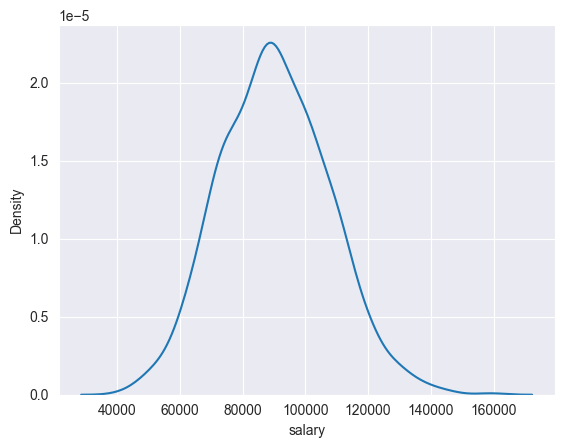

In [9]:
sns.kdeplot(x='salary',data=df)

<Axes: xlabel='salary', ylabel='Count'>

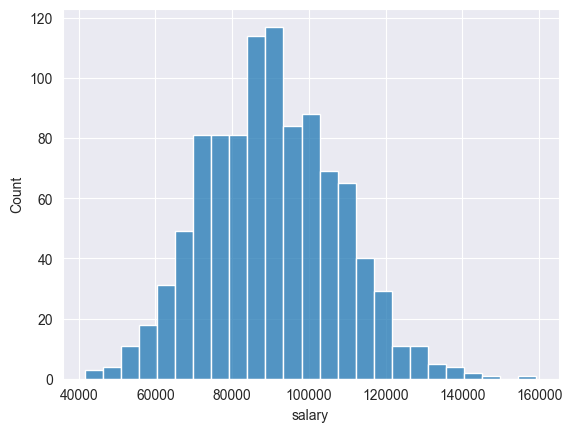

In [10]:
sns.histplot(x='salary',data=df)

In [11]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


<Axes: ylabel='salary'>

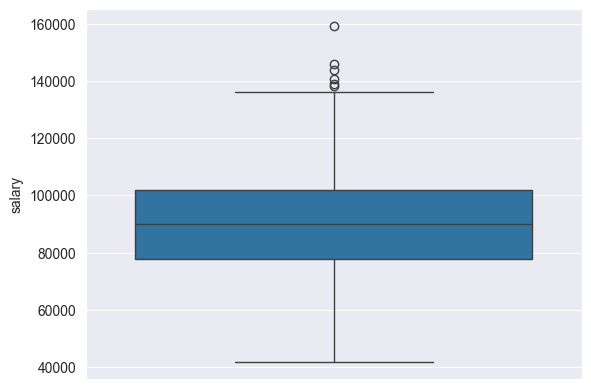

In [12]:
sns.boxplot(data=df, y='salary') #to plot full distribution of salary column

<Axes: xlabel='work experience', ylabel='salary'>

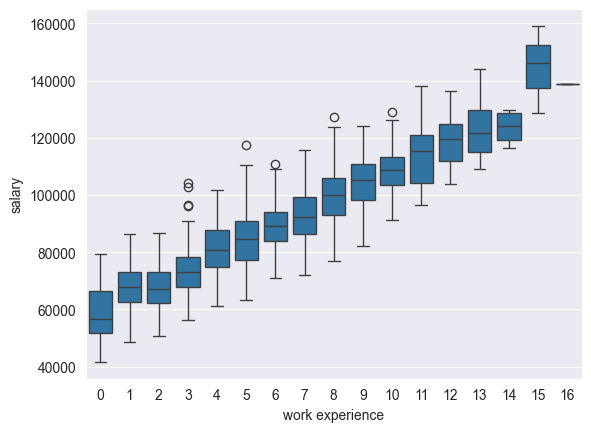

In [13]:
#to plot salary box plot wrt categorical 
sns.boxplot(data=df, y='salary',x='work experience')

<Axes: ylabel='salary'>

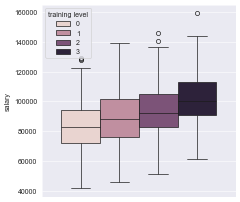

In [14]:
plt.figure(figsize=(5,5),dpi=50)
sns.boxplot(data=df, y='salary',hue='training level')

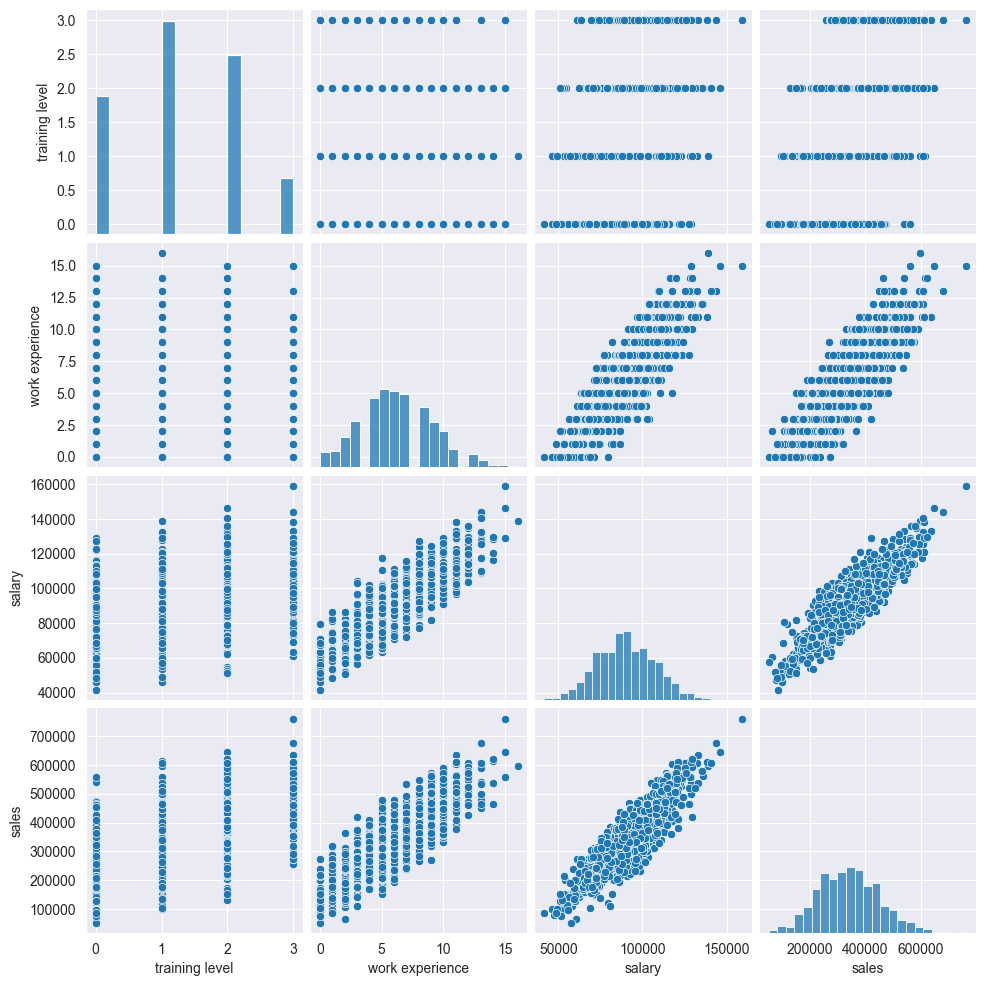

In [15]:
sns.pairplot(df) #works only for all numeric attributes in df

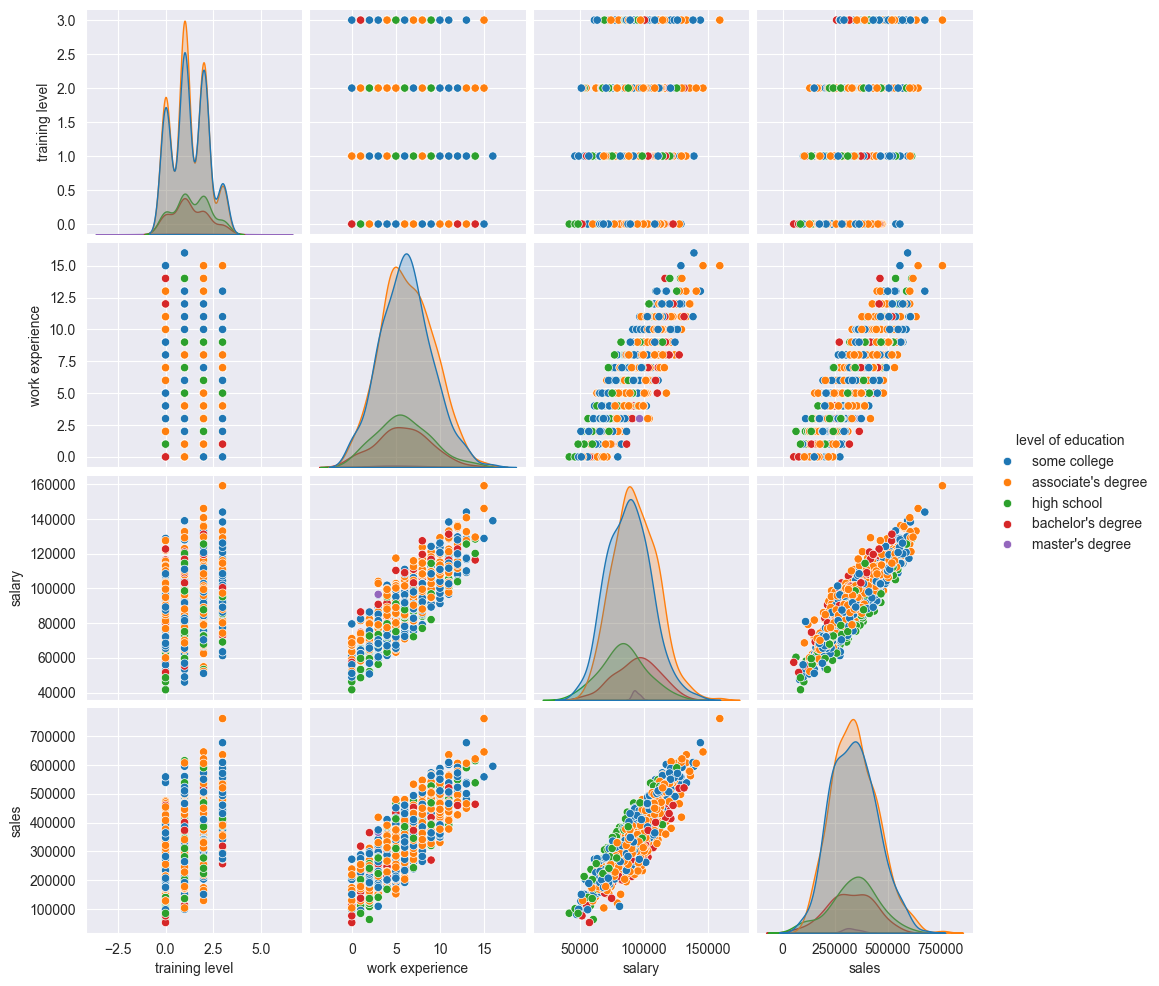

In [16]:
sns.pairplot(df,hue='level of education')

In [19]:
numeric_df=df.select_dtypes(include='number')

In [21]:
numeric_df.head()

,training level,work experience,salary,sales
0,2,6,91684,372302
1,2,10,119679,495660
2,0,9,82045,320453
3,2,5,92949,377148
4,1,5,71280,312802


In [20]:
from sklearn.preprocessing import normalize
numeric_norm1=normalize(numeric_df, norm='max',axis=0)

In [22]:
df_numeric_norm1=pd.DataFrame(numeric_norm1,columns=['training level','work experience','salary','sales'])

In [24]:
df_numeric_norm1.head()

,training level,work experience,salary,sales
0,0.666667,0.3750,0.576093,0.488921
1,0.666667,0.6250,0.751998,0.650919
2,0.000000,0.5625,0.515526,0.420831
3,0.666667,0.3125,0.584041,0.495285
4,0.333333,0.3125,0.447885,0.410783


Text(0.5, 1.0, 'scatter plot salary vs sales')

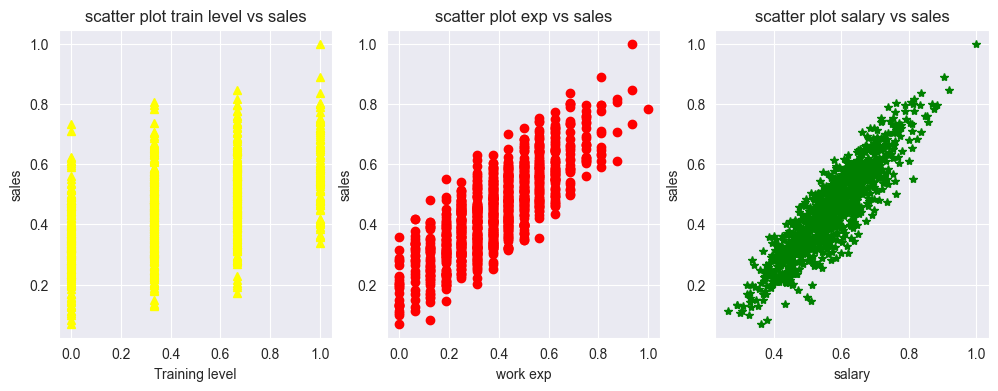

In [ ]:
#plot scatter plot of each numeric feature v/s sales to check which 2 features are positively correlated
fig,axes=plt.subplots(nrows=1,ncols=3, figsize=(12,4),dpi=100)
axes[0].plot(df_numeric_norm1['training level'],df_numeric_norm1['sales'],'^',color='yellow')
axes[0].set_xlabel('Training level')
axes[0].set_ylabel('sales')
axes[0].set_title('scatter plot train level vs sales')

axes[1].plot(df_numeric_norm1['work experience'],df_numeric_norm1['sales'],'o',color='red')
axes[1].set_xlabel('work exp')
axes[1].set_ylabel('sales')
axes[1].set_title('scatter plot exp vs sales')

axes[2].plot(df_numeric_norm1['salary'],df_numeric_norm1['sales'],'*',color='green')
axes[2].set_xlabel('salary')
axes[2].set_ylabel('sales')
axes[2].set_title('scatter plot salary vs sales')

<Axes: >

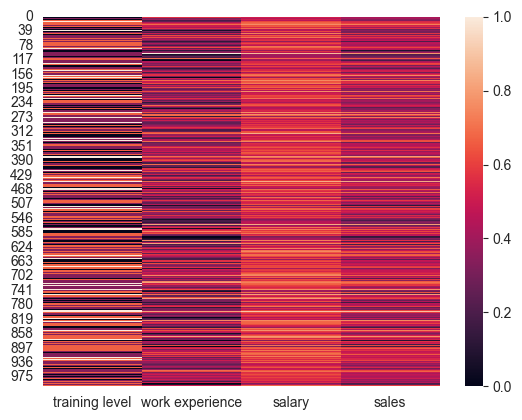

In [23]:
sns.heatmap(df_numeric_norm1)

In [26]:
correlation_matrix = df_numeric_norm1.corr()

Text(0.5, 1.0, 'Feature Correlation Heatmap')

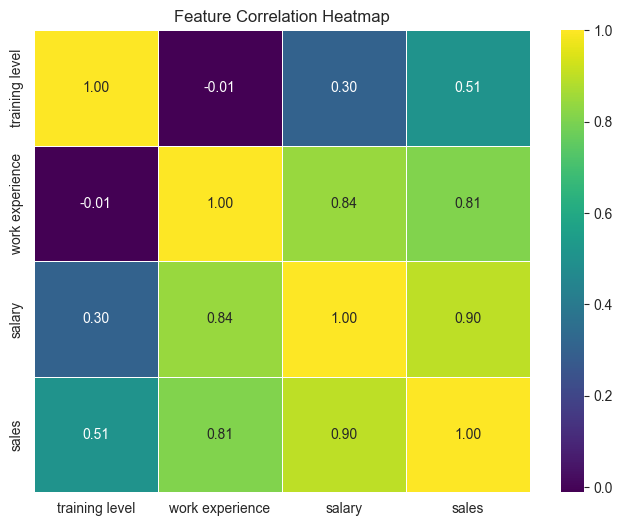

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5) #cmap='coolwarm'
plt.title("Feature Correlation Heatmap")

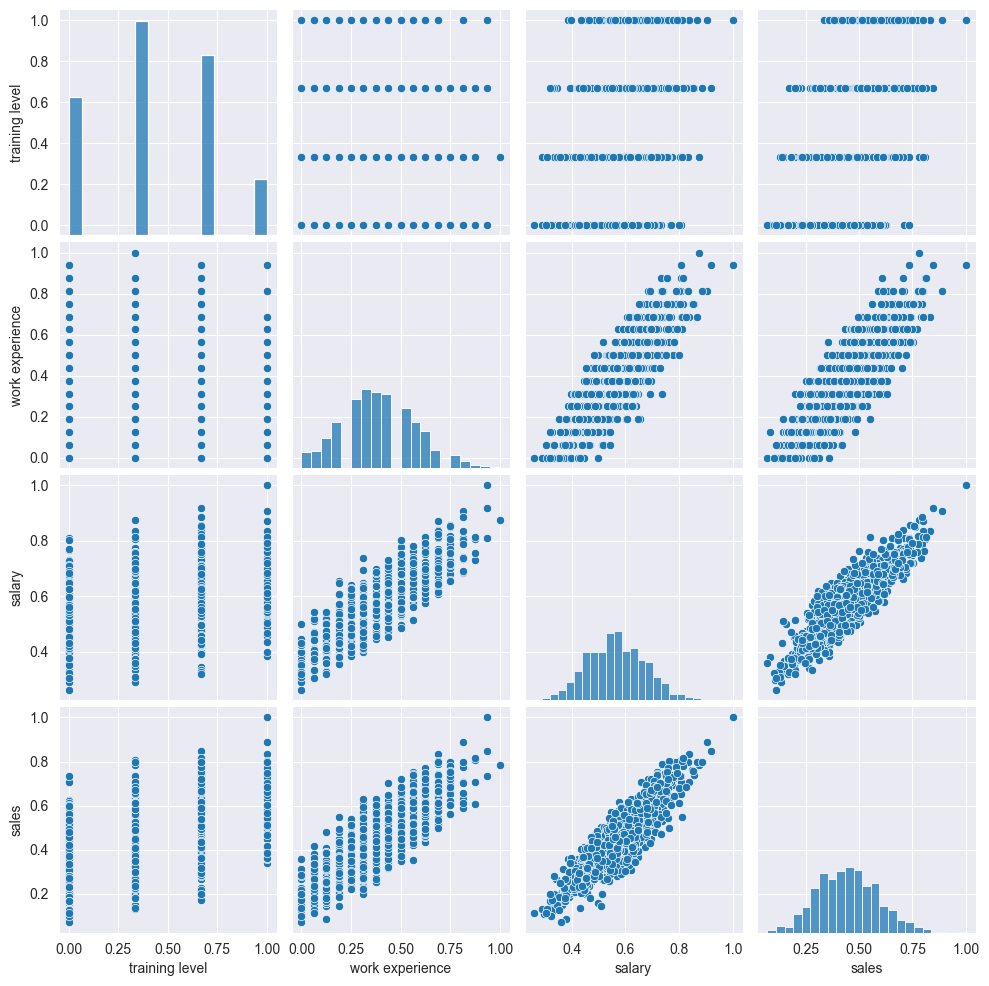

In [49]:
sns.pairplot(df_numeric_norm1)

<Figure size 2000x1200 with 0 Axes>

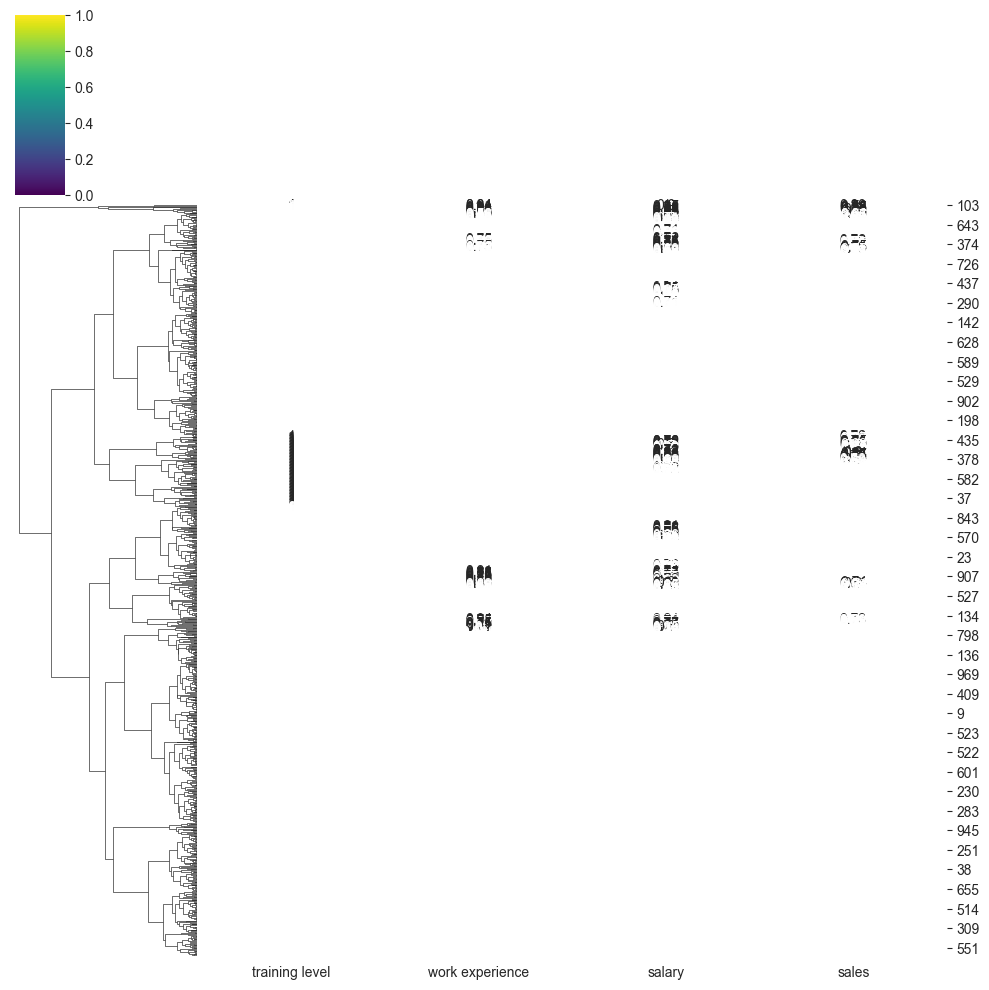

In [48]:
plt.figure(figsize=(20,12),dpi=100)
sns.clustermap(df_numeric_norm1,lw=0.5,annot=True,cmap='viridis',col_cluster=False)